# Datenjournalismus in Python - 
# Eine praktische Einführung in die Programmierung


### Natalie Widmann




Wintersemester 2022 / 2023


Universität Leipzig





### Ziel

Wir visualisieren die Daten im EM-DAT Datensatz und bauen ein Länderdashboard damit.


![Datenpipeline](../imgs/datapipeline.png)

In [4]:
# Install a pip package im Jupyter Notebook
!pip3 install pandas
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
data = pd.read_csv('../data/clean_emdat.csv', index_col=0)

In [10]:
data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
1,1900,Cabo Verde,Climatological,Drought,Drought,1,11000.0,11000.0,NaN,3.077091
2,1900,India,Climatological,Drought,Drought,1,1250000.0,1250000.0,NaN,3.077091
3,1900,Jamaica,Hydrological,Flood,No Subtype,1,300.0,300.0,NaN,3.077091
4,1900,Japan,Geophysical,Volcanic activity,Ash fall,1,30.0,30.0,NaN,3.077091
5,1900,Turkey,Geophysical,Earthquake,Ground movement,1,140.0,140.0,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,Hydrological,Flood,Flash flood,1,3400.0,13.0,NaN,NaN
10339,2022,South Africa,Hydrological,Flood,No Subtype,7,143119.0,562.0,3.164000e+09,NaN
10340,2022,Zambia,Hydrological,Flood,No Subtype,1,15000.0,3.0,NaN,NaN
10341,2022,Zimbabwe,Hydrological,Flood,No Subtype,1,0.0,0.0,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10342 entries, 1 to 10342
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          10342 non-null  int64  
 1   Country                       10342 non-null  object 
 2   Disaster Subroup              10342 non-null  object 
 3   Disaster Type                 10342 non-null  object 
 4   Disaster Subtype              10342 non-null  object 
 5   Total Events                  10342 non-null  int64  
 6   Total Affected                10342 non-null  float64
 7   Total Deaths                  10342 non-null  float64
 8   Total Damage (USD, original)  3796 non-null   float64
 9   CPI                           10149 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 888.8+ KB


## Das Dashboard...

## Recherchefragen

- Wie viele Todesopfer gibt es in einem Land?
- Wie stark ist ein Land von Naturkatastrophen betroffen?
- Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen daran?
- Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

### Wie viele Todesopfer gibt es in einem Land?

#### Wie viele Todesopfer gibt es insgesamt?

In [13]:
data["Total Deaths"].sum()

22845977.0

#### Wie viele Todesopfer gibt es insgesamt in Deutschland?

In [15]:
data['Country'] == 'Germany'

1        False
2        False
3        False
4        False
5        False
         ...  
10338    False
10339    False
10340    False
10341    False
10342    False
Name: Country, Length: 10342, dtype: bool

In [16]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
3121,1990,Germany,Meteorological,Storm,No Subtype,6,64.0,64.0,4.440000e+09,48.218797
3289,1991,Germany,Meteorological,Storm,No Subtype,1,0.0,0.0,5.000000e+06,50.260853
3431,1992,Germany,Geophysical,Earthquake,Ground movement,1,1525.0,1.0,5.000000e+07,51.783162
3432,1992,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.010000e+07,51.783162
3582,1993,Germany,Hydrological,Flood,Riverine flood,1,100000.0,5.0,6.000000e+08,53.311620
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


#### Korrektur der Ländernamen für Deutschland

In [17]:
# Vorkommen von Deutschland
for country in data['Country'].unique():
    if 'german' in country.lower():
        print(country)

Germany Fed Rep
Germany Dem Rep
Germany


Schreibe eine Funktion die dies bereinigt.

**Eingabe**: beliebiger Ländername (bspw. Indonesia, Belgium, Germany Fed Rep, etc.)

**Ausgabe**: der Ländername oder Germany falls einer der oben gelisteten Namen eingegeben wurde

In [25]:
def clean_country

IndentationError: expected an indented block (2745050268.py, line 1)

In [20]:
text = 'Germany Fed Rep'
clean_text = clean_country(text)
print(text)

Germany Fed Rep


Anwendung der Funktion auf alle Werte einer Spalte

In [21]:
for index, row in data.iterrows():
    data.loc[index, "Country"] = clean_country(row['Country'])

In [22]:
help(data.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [23]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
3121,1990,Germany,Meteorological,Storm,No Subtype,6,64.0,64.0,4.440000e+09,48.218797
3289,1991,Germany,Meteorological,Storm,No Subtype,1,0.0,0.0,5.000000e+06,50.260853
3431,1992,Germany,Geophysical,Earthquake,Ground movement,1,1525.0,1.0,5.000000e+07,51.783162
3432,1992,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.010000e+07,51.783162
3582,1993,Germany,Hydrological,Flood,Riverine flood,1,100000.0,5.0,6.000000e+08,53.311620
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


**Alternative Lösungsmöglichkeit** (viel übersichtlicher und effizienter)

mit `apply()` kann eine Funktion auf eine komplette Spalte oder Zeile des Dataframes angewendet werden

In [24]:
data['Country'] = data['Country'].apply(clean_country)

In [23]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
3121,1990,Germany,Meteorological,Storm,No Subtype,6,64.0,64.0,4.440000e+09,48.218797
3289,1991,Germany,Meteorological,Storm,No Subtype,1,0.0,0.0,5.000000e+06,50.260853
3431,1992,Germany,Geophysical,Earthquake,Ground movement,1,1525.0,1.0,5.000000e+07,51.783162
3432,1992,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.010000e+07,51.783162
3582,1993,Germany,Hydrological,Flood,Riverine flood,1,100000.0,5.0,6.000000e+08,53.311620
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


#### Wie viele Todesopfer gab es insgesamt in Deutschland?

In [28]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
3121,1990,Germany,Meteorological,Storm,No Subtype,6,64.0,64.0,4.440000e+09,48.218797
3289,1991,Germany,Meteorological,Storm,No Subtype,1,0.0,0.0,5.000000e+06,50.260853
3431,1992,Germany,Geophysical,Earthquake,Ground movement,1,1525.0,1.0,5.000000e+07,51.783162
3432,1992,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.010000e+07,51.783162
3582,1993,Germany,Hydrological,Flood,Riverine flood,1,100000.0,5.0,6.000000e+08,53.311620
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


#### Wie viele Todesopfer gab es insgesamt in Indien?

#### Allgemeine Funktion die Gesamtzahl der Todesopfer eines Landes ausgibt

## Dashboard Teil II

### Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen in Deutschland?

# Visualisierung von DataFrames

[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Matplotlib makes easy things easy and hard things possible.

Install matplotlib:

In [71]:
!pip3 install --upgrade pip
!pip3 install --upgrade Pillow
!pip3 install matplotlib

import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [37]:
germany_data = data[data['Country'] == 'Germany']

In [38]:
germany_data['Disaster Type'].value_counts()

Storm                   36
Flood                   16
Extreme temperature     11
Earthquake               2
Landslide                1
Name: Disaster Type, dtype: int64

<AxesSubplot: >

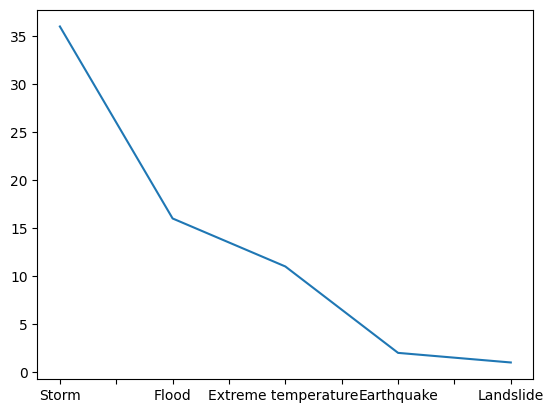

In [39]:
germany_data['Disaster Type'].value_counts().plot()

<AxesSubplot: ylabel='Disaster Type'>

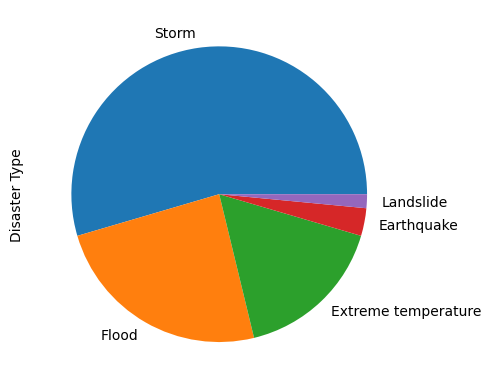

In [36]:
germany_data['Disaster Type'].value_counts().plot(kind='pie')

## Recherchefragen

#### Welche Naturkatastrophen fordern die meisten Todesopfer?

`.groupby()` gruppiert einen DataFrame nach den Werten einer oder mehreren Spalten.

Die Spalten nach denen man Gruppieren möchte werden als Argument übergeben. Danach folgt die gewünschte Berechnung auf dieser Gruppe. Das Ergebnis wird als DataFrame zurückgegeben. 

In [40]:
data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
1,1900,Cabo Verde,Climatological,Drought,Drought,1,11000.0,11000.0,NaN,3.077091
2,1900,India,Climatological,Drought,Drought,1,1250000.0,1250000.0,NaN,3.077091
3,1900,Jamaica,Hydrological,Flood,No Subtype,1,300.0,300.0,NaN,3.077091
4,1900,Japan,Geophysical,Volcanic activity,Ash fall,1,30.0,30.0,NaN,3.077091
5,1900,Turkey,Geophysical,Earthquake,Ground movement,1,140.0,140.0,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,Hydrological,Flood,Flash flood,1,3400.0,13.0,NaN,NaN
10339,2022,South Africa,Hydrological,Flood,No Subtype,7,143119.0,562.0,3.164000e+09,NaN
10340,2022,Zambia,Hydrological,Flood,No Subtype,1,15000.0,3.0,NaN,NaN
10341,2022,Zimbabwe,Hydrological,Flood,No Subtype,1,0.0,0.0,NaN,NaN


In [44]:
data['Total Deaths'].sum()

22845977.0

In [48]:
data.groupby('Disaster Type')['Total Deaths'].sum()

Disaster Type
Animal accident                12.0
Drought                  11733889.0
Earthquake                2343594.0
Extreme temperature        194056.0
Flood                     7002950.0
Fog                          4000.0
Glacial lake outburst         262.0
Insect infestation              0.0
Landslide                   67417.0
Mass movement (dry)          4644.0
Storm                     1403607.0
Volcanic activity           86893.0
Wildfire                     4653.0
Name: Total Deaths, dtype: float64

In [49]:
data.groupby('Disaster Type').sum()

/tmp/ipykernel_469165/3612715955.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Disaster Type').sum()


,Year,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
Disaster Type,,,,,,
Animal accident,2014,1,5.000000e+00,12.0,0.000000e+00,87.366298
Drought,1543555,792,2.869852e+09,11733889.0,2.098881e+11,43039.824471
Earthquake,2134925,1576,2.052983e+08,2343594.0,8.653494e+11,46522.663819
Extreme temperature,1115693,607,1.038223e+08,194056.0,6.886634e+10,38106.532522
Flood,7604541,5730,3.967537e+09,7002950.0,9.771118e+11,239869.775450
Fog,1952,1,4.000000e+03,4000.0,0.000000e+00,9.822074
Glacial lake outburst,4043,3,3.600000e+01,262.0,2.100000e+08,100.000000
Insect infestation,183314,95,2.802200e+06,0.0,2.292000e+08,4880.908507
Landslide,1277348,789,1.480567e+07,67417.0,1.125893e+10,36989.405750


`.groupby()` kann auch auf mehrere Spalten gleichzeitig angewendet werden

In [50]:
data.groupby(['Disaster Type', 'Disaster Subtype'])['Total Deaths'].sum()

Disaster Type          Disaster Subtype                
Animal accident        No Subtype                                12.0
Drought                Drought                             11733812.0
                       No Subtype                                77.0
Earthquake             Ground movement                      2075949.0
                       No Subtype                               221.0
                       Tsunami                               267424.0
Extreme temperature    Cold wave                              17765.0
                       Heat wave                             172555.0
                       Severe winter conditions                3736.0
Flood                  Coastal flood                           5352.0
                       Flash flood                            70835.0
                       No Subtype                           2480837.0
                       Riverine flood                       4445926.0
Fog                    No Subtype 

### Visualisierung

<AxesSubplot: ylabel='Total Deaths'>

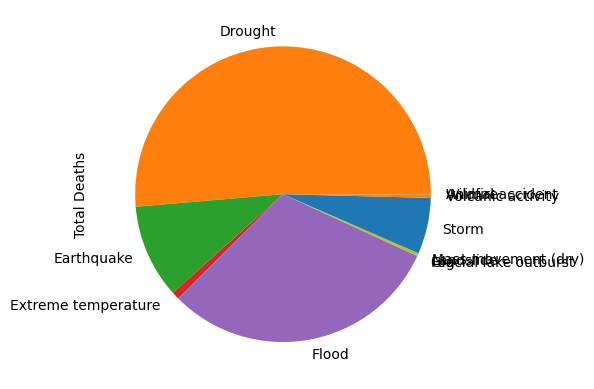

In [55]:
data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

#### Welche Naturkatastrophen fordern die meisten Todesopfer in Deutschland?

#### Generelle Funktion

<AxesSubplot: ylabel='Total Deaths'>

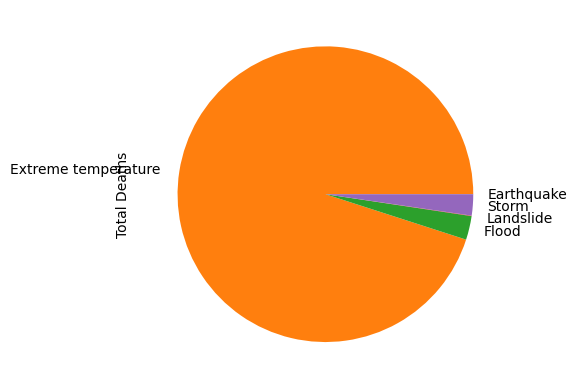

In [58]:
country = 'Germany'
country_data = data[data['Country'] == country]
country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

In [ ]:
def plot_death_by_disastertype

## Dashboard Teil III

#### Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

In [60]:
germany_data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
3121,1990,Germany,Meteorological,Storm,No Subtype,6,64.0,64.0,4.440000e+09,48.218797
3289,1991,Germany,Meteorological,Storm,No Subtype,1,0.0,0.0,5.000000e+06,50.260853
3431,1992,Germany,Geophysical,Earthquake,Ground movement,1,1525.0,1.0,5.000000e+07,51.783162
3432,1992,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.010000e+07,51.783162
3582,1993,Germany,Hydrological,Flood,Riverine flood,1,100000.0,5.0,6.000000e+08,53.311620
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


**Berechne für jedes Jahr die Summe aus allen `Events`**

In [ ]:
yearly_events = data.groupby('Year')['Total Events'].sum()
yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')

**Plotte für Deutschland die Entwicklung der Anzahl an Naturkatastrophen über die Jahre hinweg**

**Generelle Funktion**

## Länderdashboard

In [72]:
def plot_pie(country_data):
    country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie', title='Anteil an getöten Menschen nach Naturkatastrophentyp')
    plt.show()

In [73]:
def plot_time_evolution(country_data):
    yearly_events = country_data.groupby('Year')['Total Events'].sum()
    yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')
    plt.show()

In [74]:
def death_overview(country_data):
    total_deaths = country_data["Total Deaths"].sum()
    print(f'Getötete Menschen seit 1900: {total_deaths:,.0f}')

In [75]:
def compute_anteil(country_total, world_total):
    anteil = round(country_total / (world_total / 100.0), 2)
    print(f'{anteil}% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.')

In [76]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    
    compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    death_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

Naturkatastrophen in BANGLADESH 

5.57% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.
Getötete Menschen seit 1900: 2,590,902


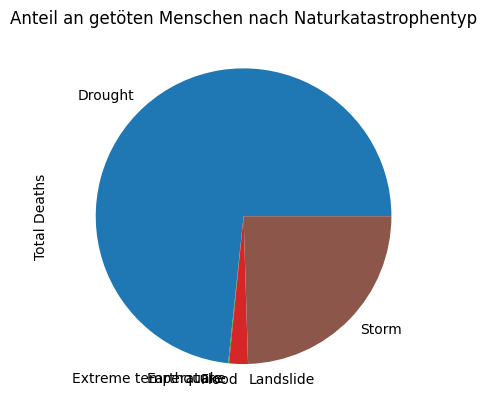

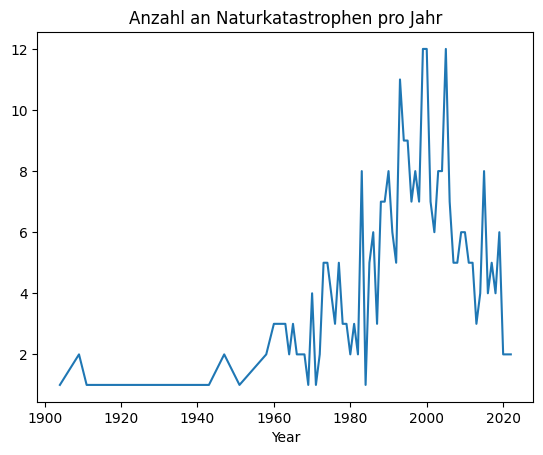

In [77]:
analyze(data, 'Bangladesh')

### Überblick über die Welt

Wie können wir die selbstdefinierte Funktion `analyze()` anpassen, so dass auch eine Gesamtstatistik, die alle Länder der Welt enthält abgefragt werden kann?

In [80]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    
    compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    death_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

Naturkatastrophen in WORLD 

0.0% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.
Getötete Menschen seit 1900: 0


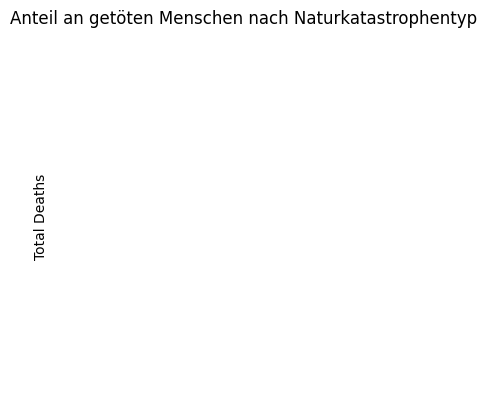

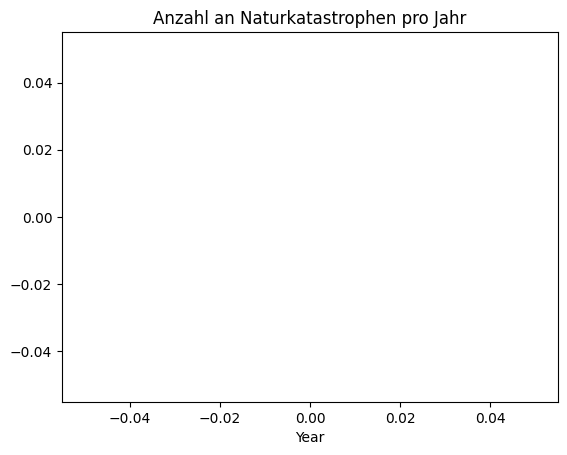

In [81]:
analyze(data, 'world')

# Zeit für Feedback



Link: https://ahaslides.com/HP3D5

![Feedback QR Code](../imgs/qrcode_vl7.png)

